In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# To find the most uptodate date
Last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Last_date)

# Calculate the date 1 year ago from the last data point in the database

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print(one_year_ago)

# Perform a query to retrieve the date and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df=pd.DataFrame(results,columns=["Date","Precipitation"])

# Sort the dataframe by date
df.set_index(df["Date"],inplace= True)
df



('2017-08-23',)


,Date,Precipitation
Date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00
...,...,...
2017-08-19,2017-08-19,0.09
2017-08-20,2017-08-20,NaN
2017-08-21,2017-08-21,0.56


Text(0, 0.5, 'Precipitation')

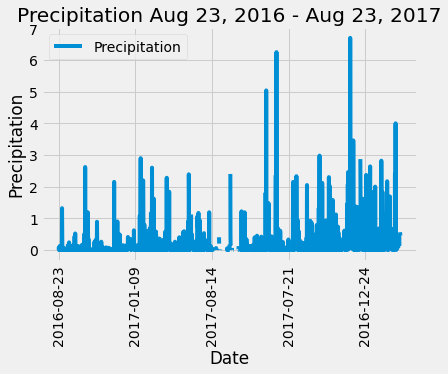

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.title('Precipitation Aug 23, 2016 - Aug 23, 2017')
plt.xlabel('Date')
plt.ylabel('Precipitation')
 


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["Precipitation"].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

('2017-08-23',)
2016-08-23
     temperature
0           77.0
1           77.0
2           80.0
3           80.0
4           75.0
..           ...
347         77.0
348         77.0
349         76.0
350         76.0
351         79.0

[352 rows x 1 columns]


Text(0.5, 1.0, 'Temperature Aug 23, 2016 - Aug 23, 2017')

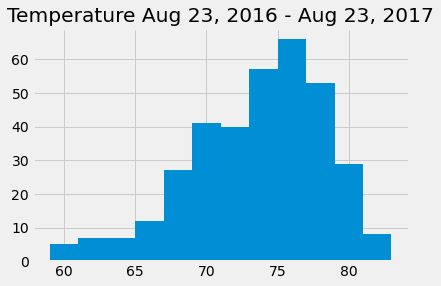

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Station with highest number of temperature observations
session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).first()

# To find the most uptodate date
Last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(Last_date)

# Calculate the date 1 year ago from the last data point in the database

one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_ago)

# Perform a query to retrieve the temperature for the most active station

results = session.query(Measurement.tobs).filter(Measurement.date >= one_year_ago).filter(Measurement.station=='USC00519281').all()
#print(results)

# Save the query results as a Pandas DataFrame 
df=pd.DataFrame(results,columns=["temperature"])
print(df)

df.hist(bins=12)
plt.title('Temperature Aug 23, 2016 - Aug 23, 2017')





## Bonus Challenge Assignment

In [17]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [18]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date=2014-3-25
end_date=2014-4-15

trip_start_date = dt.date(2014, 3, 25) - dt.timedelta(days=365)
trip_end_date=dt.date(2014,4,15)-dt.timedelta(days=365)
x,y,z=calc_temps(trip_start_date, trip_end_date)[0]
print(x,y,z)

53.0 70.21472392638037 81.0


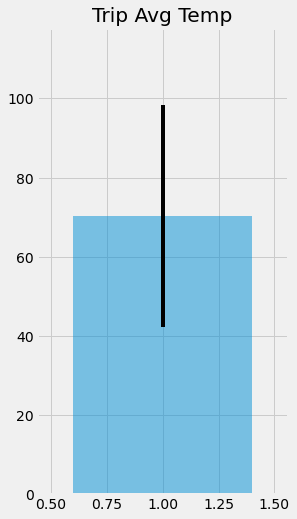

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))
yerr=z-x
xpos=1

ax.bar(xpos, y, yerr=yerr, alpha=0.5)
ax.margins(0.2)
ax.set(title="Trip Avg Temp")
ylabel="Temp"

In [20]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

Rainfall = func.avg(Measurement.prcp).label("Rainfall")
ly_rainfall = session.query(Station.station, Station.name, Station.latitude, Station.longitude,Station.elevation, \
                            func.avg(Measurement.prcp).label("Rainfall")).\
                filter(Measurement.station == Station.station).filter(Measurement.date >= '2014-03-25').\
                filter(Measurement.date <= '2014-04-15').group_by(Measurement.station).order_by(Rainfall.desc())


index = 0
for rf in ly_rainfall:
    print(ly_rainfall[index])
    index = index + 1

('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.523157894736842)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.38363636363636355)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.28318181818181815)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.14499999999999996)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.052500000000000005)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0385)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.025)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.02)


In [21]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [22]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [23]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [24]:
# Plot the daily normals as an area plot with `stacked=False`
